In [1]:
#最低気温
import requests
from bs4 import BeautifulSoup
res = requests.get("https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view=")
soup = BeautifulSoup(res.text, 'html.parser')
raw_data = soup.find_all("td", class_ = "data_0_0")
for i in range(7,500,20):
    print(raw_data[i].text)


In [48]:
import requests
from bs4 import BeautifulSoup

res = requests.get("https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view=")
soup = BeautifulSoup(res.text, 'html.parser')
raw_data = soup.find_all("td", class_="data_0_0")

temperature_list = []

for i in range(7, 500, 20):
    temperature_list.append(float(raw_data[i].text))

print(temperature_list)


[6.4, 4.1, 4.1, 4.7, 5.7, 7.1, 7.1, 6.0, 6.4, 7.2, 11.3, 9.7, 7.3, 6.5, 7.1, 10.8, 5.9, 3.8, 3.4, 4.6, 3.3, 1.5, 0.1, 2.0, 1.0]


In [42]:
#平均湿度
import requests
from bs4 import BeautifulSoup
res = requests.get("https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view=")
soup = BeautifulSoup(res.text, 'html.parser')
raw_data = soup.find_all("td", class_ = "data_0_0")
for i in range(8,500,20):
    print(raw_data[i].text)

54
60
58
53
64
77
60
49
66
65
74
92
52
62
82
71
36
36
53
59
41
38
47
55
56


In [51]:
import requests
from bs4 import BeautifulSoup

res = requests.get("https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view=")
soup = BeautifulSoup(res.text, 'html.parser')
raw_data = soup.find_all("td", class_="data_0_0")

# 湿度データをリストに格納
humidity_data = [int(raw_data[i].text) for i in range(8, 500, 20)]

# リストを表示
print(humidity_data)


[54, 60, 58, 53, 64, 77, 60, 49, 66, 65, 74, 92, 52, 62, 82, 71, 36, 36, 53, 59, 41, 38, 47, 55, 56]


In [1]:
import sqlite3
conn = sqlite3.connect('/Users/hiromasa/dspro2/weather_data.db')
path = '/Users/hiromasa/dspro2/weather_data.db'
conn = sqlite3.connect(path)
cur = conn.cursor()

cur.execute('''
    CREATE TABLE IF NOT EXISTS weather (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        suiminzikan,
        date TEXT,
        saitei_kion FLOAT,
        situdo INTEGER
    )
''')

conn.commit()
conn.close()

In [2]:
import sqlite3

# 仮の最低気温、平均湿度、睡眠時間のリスト
saitei_kion_list = [6.4, 4.1, 4.1, 4.7, 5.7, 7.1, 7.1, 6.0, 6.4, 7.2, 11.3, 9.7, 7.3, 6.5, 7.1, 10.8, 5.9, 3.8, 3.4, 4.6, 3.3, 1.5, 0.1, 2.0, 1.0]
situdo_list = [54, 60, 58, 53, 64, 77, 60, 49, 66, 65, 74, 92, 52, 62, 82, 71, 36, 36, 53, 59, 41, 38, 47, 55, 56]
sleep_time_list = [473, 401, 445, 345, 386, 361, 422, 341, 335, 486, 501, 503, 300, 321, 284, 452, 517, 284, 381, 379, 409, 395, 483, 358, 510]


conn = sqlite3.connect(path)
cur = conn.cursor()


for i in range(len(saitei_kion_list)):
    cur.execute('''
        INSERT INTO weather (date, saitei_kion, situdo, suiminzikan)
        VALUES (?, ?, ?, ?)''', (f'2023-12-{i+1}', saitei_kion_list[i], situdo_list[i], sleep_time_list[i]))


conn.commit()
conn.close()


/Users/hiromasa/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiromasa/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30496 (\N{CJK UNIFIED IDEOGRAPH-7720}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiromasa/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiromasa/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiromasa/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/pylabtools.py:15

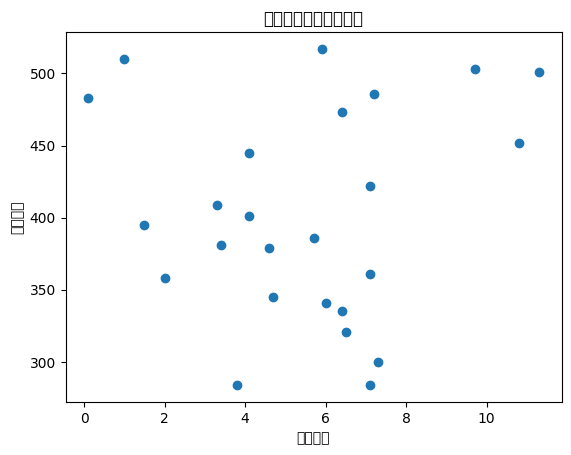

In [8]:
import sqlite3
import matplotlib.pyplot as plt

# SQLiteデータベースに接続
conn = sqlite3.connect('/Users/hiromasa/dspro2/weather_data.db')
cur = conn.cursor()

# データを取得
cur.execute('SELECT saitei_kion,suiminzikan FROM weather')
data = cur.fetchall()

# 接続を閉じる
conn.close()

# データを抽出
temperatures = [float(row[0]) for row in data]
sleep_times = [row[1] for row in data]

# 散布図を描く
plt.scatter(temperatures, sleep_times)
plt.title('気温と睡眠時間の関係')
plt.xlabel('最低気温')
plt.ylabel('睡眠時間')
plt.show()


In [ ]:
#考察
#相関は感じられない